In [20]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Comparison of Average Housing Costs to % of individuals 65+ and head of family

In [21]:
# start by finding percent of people 65 or older - get and clean graphs.
data = pd.read_csv("cleanData.csv")
relevantdata = pd.DataFrame()

relevantdata["Total Average Housing Costs with all plumbing facilities"] = data.iloc[:,117]
relevantdata["Persons 65 and over head of family"] = data["Persons 65 and over head of family"]
relevantdata["Total persons family head of husband-wife household"] = data["Total persons family head of husband-wife household"]
relevantdata["Total persons family head of household with other male head"] = data["Total persons family head of household with other male head"]
relevantdata["Total persons family head of household with female head"] = data["Total persons family head of household with female head"]

relevantdata["Total Average Housing Costs with all plumbing facilities"] = relevantdata["Total Average Housing Costs with all plumbing facilities"].str.replace("$","")
relevantdata["Total Average Housing Costs with all plumbing facilities"] = relevantdata["Total Average Housing Costs with all plumbing facilities"].replace("0.00",np.nan)

for col in relevantdata:
    relevantdata[col] = relevantdata[col].str.replace("$","")
    relevantdata[col] = relevantdata[col].str.replace(",","")
   # relevantdata[col] = relevantdata[col].str.replace(".00","")
    relevantdata[col] = relevantdata[col].replace("...", np.nan)
    relevantdata[col] = relevantdata[col].replace(" ... ", np.nan)
    relevantdata[col] = relevantdata[col].replace(" -   ", np.nan)
    relevantdata[col] = relevantdata[col].replace("", np.nan)
    relevantdata = relevantdata.dropna()
    relevantdata[col] = relevantdata[col].astype(str).astype(float)
    
relevantdata["Percent of heads of family over 65"] = relevantdata["Persons 65 and over head of family"] / (relevantdata["Total persons family head of husband-wife household"] + relevantdata["Total persons family head of household with other male head"] + relevantdata["Total persons family head of household with female head"])
relevantdata

,Total Average Housing Costs with all plumbing facilities,Persons 65 and over head of family,Total persons family head of husband-wife household,Total persons family head of household with other male head,Total persons family head of household with female head,Percent of heads of family over 65
0,32255.0,53.0,194.0,5.0,27.0,0.234513
1,29485.0,27.0,142.0,3.0,29.0,0.155172
2,37151.0,28.0,121.0,3.0,12.0,0.205882
3,44712.0,31.0,107.0,1.0,11.0,0.260504
4,33229.0,26.0,126.0,2.0,15.0,0.181818
...,...,...,...,...,...,...
1258,28269.0,5.0,24.0,0.0,3.0,0.185185
1259,22050.0,22.0,79.0,0.0,4.0,0.265060
1260,25313.0,10.0,71.0,2.0,5.0,0.128205
1261,33290.0,30.0,105.0,2.0,8.0,0.260870


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


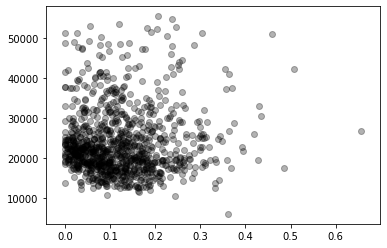

In [22]:
#A little disappointing
plt.scatter(relevantdata["Percent of heads of family over 65"], relevantdata["Total Average Housing Costs with all plumbing facilities"], c=colors, alpha=0.3)

In [23]:
# Total Average price vs. 1-(white owner occupied housing / total owner occupied housing)
relevantdata2 = pd.DataFrame()

relevantdata2["Total Average Housing Costs with all plumbing facilities"] = data.iloc[:,117]
relevantdata2["Total owner occupied housing units"] = data["Total owner occupied housing units (includes White, Black and other races)"]
relevantdata2["White owner occupied housing units"] = data["White owner occupied housing units head of household"]

relevantdata2["Total Average Housing Costs with all plumbing facilities"] = relevantdata2["Total Average Housing Costs with all plumbing facilities"].str.replace("$","")
relevantdata2["Total Average Housing Costs with all plumbing facilities"] = relevantdata2["Total Average Housing Costs with all plumbing facilities"].replace("0.00",np.nan)

for col in relevantdata2:
    relevantdata2[col] = relevantdata2[col].str.replace("$","")
    relevantdata2[col] = relevantdata2[col].str.replace(",","")
    relevantdata2[col] = relevantdata2[col].replace("...", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" ... ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" -   ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace("", np.nan)
    relevantdata2 = relevantdata2.dropna()
    relevantdata2[col] = relevantdata2[col].astype(str).astype(float)
    
relevantdata2["Percent of non-white owner occupied housing units"] = 1 - (relevantdata2["White owner occupied housing units"] / relevantdata2["Total owner occupied housing units"])
relevantdata2

,Total Average Housing Costs with all plumbing facilities,Total owner occupied housing units,White owner occupied housing units,Percent of non-white owner occupied housing units
0,32255.0,249.0,246.0,0.012048
1,29485.0,200.0,198.0,0.010000
2,37151.0,158.0,158.0,0.000000
3,44712.0,127.0,126.0,0.007874
4,33229.0,177.0,176.0,0.005650
...,...,...,...,...
1258,28269.0,27.0,27.0,0.000000
1259,22050.0,78.0,78.0,0.000000
1260,25313.0,60.0,59.0,0.016667
1261,33290.0,99.0,97.0,0.020202


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


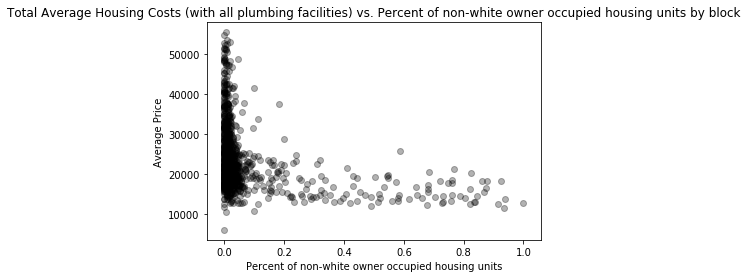

In [24]:
plt.scatter(relevantdata2["Percent of non-white owner occupied housing units"], relevantdata2["Total Average Housing Costs with all plumbing facilities"], c=colors, alpha=0.3)
plt.title('Total Average Housing Costs (with all plumbing facilities) vs. Percent of non-white owner occupied housing units by block')
plt.xlabel('Percent of non-white owner occupied housing units')
plt.ylabel('Average Price')
plt.show()

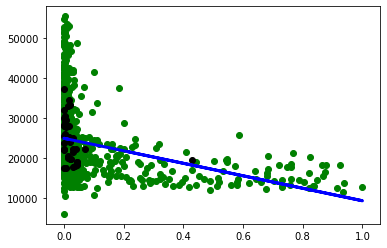

Coefficients: 
 [-15633.76475291]
Mean squared error: 25072240.46
Coefficient of determination: 0.07
Coefficient of determination: 0.10


In [29]:
non_white = pd.DataFrame()

non_white["nonwhite"] = relevantdata2["Percent of non-white owner occupied housing units"]
non_white["avcost"] = relevantdata2["Total Average Housing Costs with all plumbing facilities"]

non_white

#Convert to numpy array

X = non_white["nonwhite"].values
X = X.reshape(-1, 1)

Y = (non_white["avcost"].values)

# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
Y_train = Y[:-40]
Y_test = Y[-40:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

train_pred = regr.predict(X_train)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_train, train_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_train, train_pred))